# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from sklearn.linear_model import LinearRegression



### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 10


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1
city_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(city_url + cities[1]).json()

Beginning Data Retrieval     
-----------------------------


In [5]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    record_count += 1
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    
    response = requests.get(city_url + city).json()
    
    try:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather={"city_name": city,
            "city_lat" : response['coord']['lat'],
            "city_lng" : response['coord']['lon'],
            "city_max_temp" : response['main']['temp_max'],
            "city_humidity" : response['main']['humidity'],
            "city_clouds" : response['clouds']['all'],
            "city_wind" : response['wind']['speed'],
            "city_country" :  response['sys']['country'],
            "city_date" : response['dt']
            }
        
            # Append the City information into city_data list
        city_data.append(city_weather)
    
        # If an error is experienced, skip the city
    except Exception as e:
            print(f"{e} of {type(e)}")
            print("City not found. Skipping...")
    pass
    
        # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | petropavlovsk-kamchatsky
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | correntina
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | kodinsk
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | chebba
Processing Record 10 of Set 1 | gadzhiyevo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
cities_weather_df = pd.DataFrame(city_data)

#TODO rename column names
cities_weather_df.rename(columns={
    'city_name': 'City Name',
    'city_lat': 'Latitude',
    'city_lng': 'Longitude',
    'city_lat': 'Latitude',
    'city_max_temp': 'Max Temp',
    'city_humidity': 'Humidity',
    'city_clouds': 'Clouds',
    'city_wind': 'Wind',
    'city_country': 'Country',
    'city_date': 'Date'
}, inplace=True)
# Show Record Count
cities_weather_df.count()

City Name    10
Latitude     10
Longitude    10
Max Temp     10
Humidity     10
Clouds       10
Wind         10
Country      10
Date         10
dtype: int64

In [7]:
# Display sample data
cities_weather_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,9.33,53,75,4.00,RU,1729570310
1,tiksi,71.6872,128.8694,-15.57,98,94,1.36,RU,1729570297
2,anadyr,64.7500,177.4833,-0.72,74,40,16.00,RU,1729570312
3,correntina,-13.3433,-44.6367,20.61,97,100,1.18,BR,1729570314
4,kodiak,57.7900,-152.4072,10.73,71,75,7.20,US,1729570315


In [7]:
# Export the City_Data into a csv
cities_weather_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-11.18,84,90,2.47,RU,1729140531
1,adamstown,-25.0660,-130.1015,21.32,85,100,8.33,PN,1729140480
2,albany,42.6001,-73.9662,3.23,62,3,1.72,US,1729140468
3,iqaluit,63.7506,-68.5145,-0.15,100,100,6.71,CA,1729140534
4,bilibino,68.0546,166.4372,-2.83,96,100,1.71,RU,1729140536


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

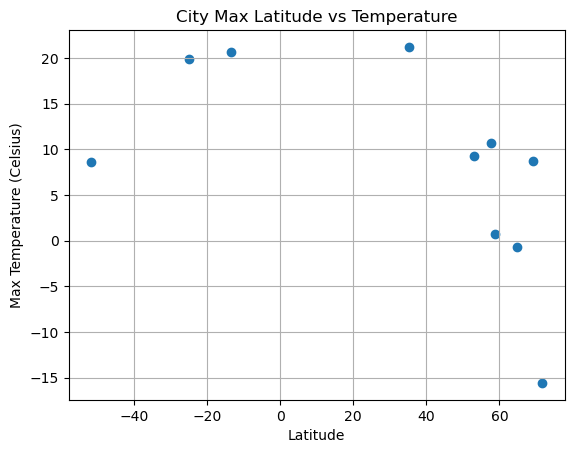

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(cities_weather_df['Latitude'], cities_weather_df['Max Temp'], marker='o')


# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

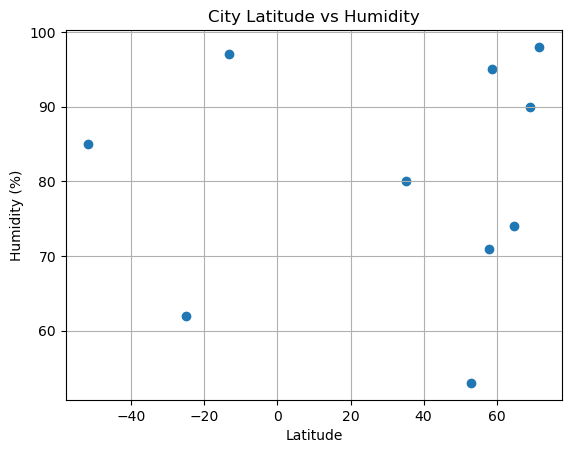

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(cities_weather_df['Latitude'], cities_weather_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

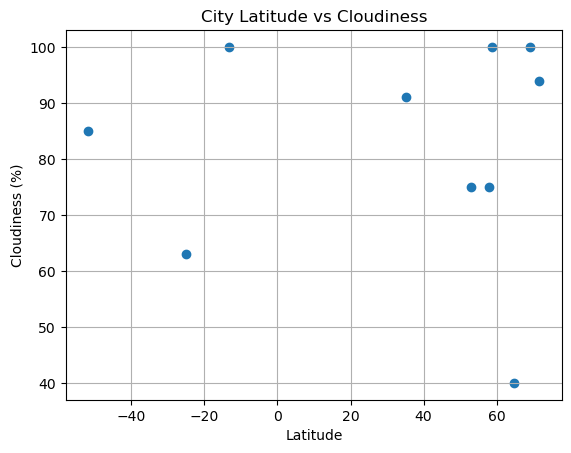

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(cities_weather_df['Latitude'], cities_weather_df['Clouds'], marker='o')


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

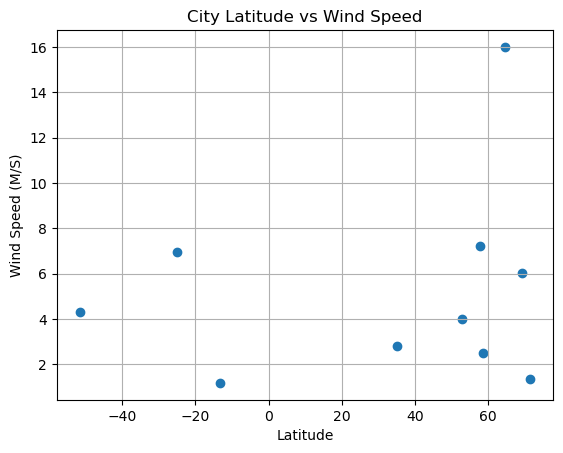

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(cities_weather_df['Latitude'], cities_weather_df['Wind'], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (M/S)")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = slope * x + intercept
    plt.scatter(x, y, color='blue', label='')
    plt.plot(x, regress_values, color='red', label='')
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.text(0.5, 0.1, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, ha='center')
    plt.legend()
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,-11.18,84,90,2.47,RU,1729140531
2,albany,42.6001,-73.9662,3.23,62,3,1.72,US,1729140468
3,iqaluit,63.7506,-68.5145,-0.15,100,100,6.71,CA,1729140534
4,bilibino,68.0546,166.4372,-2.83,96,100,1.71,RU,1729140536
6,mhamid,29.8200,-5.7200,22.43,49,99,2.46,MA,1729140538


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.32,85,100,8.33,PN,1729140480
5,port mathurin,-19.6833,63.4167,23.21,79,89,5.51,MU,1729140537
8,west island,-12.1568,96.8225,28.99,74,20,7.72,CC,1729140500


###  Temperature vs. Latitude Linear Regression Plot

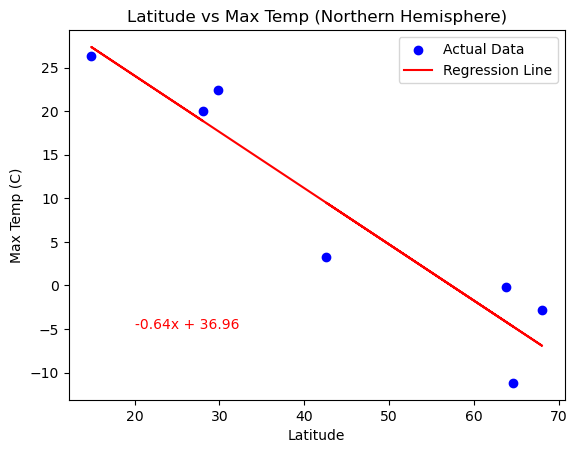

In [122]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df[['Latitude']]
y = northern_hemi_df['Max Temp']
model_temp_nh= LinearRegression()
model_temp_nh.fit(x, y)
y_pred = model_temp_nh.predict(x)
slope = model_temp_nh.coef_[0]
intercept = model_temp_nh.intercept_
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Latitude vs Max Temp (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(str(round(slope,2)) + "x + " + str(round(intercept,2)),(20,-5), color='red')
plt.legend()
plt.show()

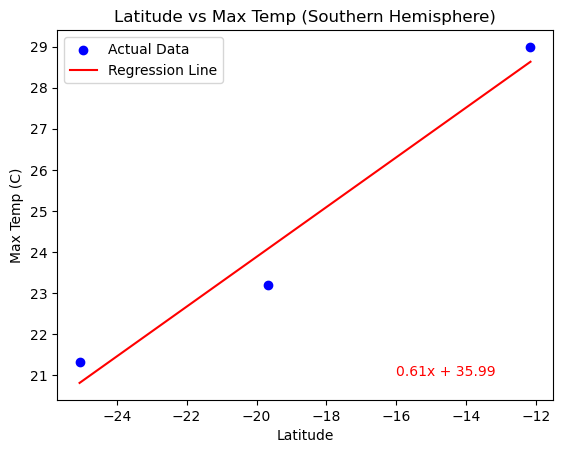

In [110]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df[['Latitude']]
y = southern_hemi_df['Max Temp']
model_temp_sh= LinearRegression()
model_temp_sh.fit(x, y)
y_pred = model_temp_sh.predict(x)
slope = model_temp_sh.coef_[0]
intercept = model_temp_sh.intercept_
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.annotate(str(round(slope,2)) + "x + " + str(round(intercept,2)),(-16,21), color='red')
plt.legend()
plt.show()

**Discussion about the linear relationship:** 

**Temperature** ***decreases*** as **latitude** ***increases*** on the *northern hemisphere*.
**Temperature** ***increases*** as **latitude** ***increases*** on the *southern hemisphere*.

### Humidity vs. Latitude Linear Regression Plot

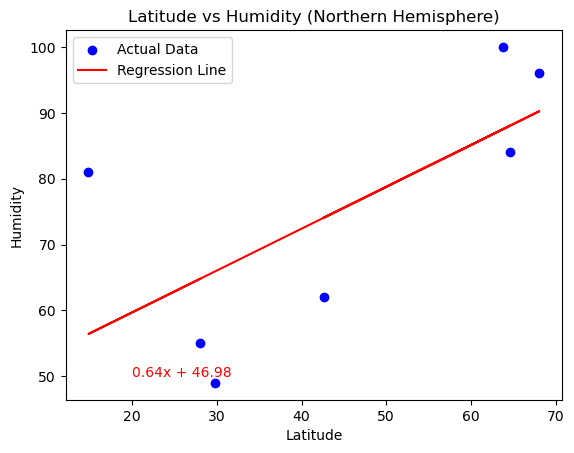

In [116]:
# Northern Hemisphere
x = northern_hemi_df[['Latitude']]
y = northern_hemi_df['Humidity']
model_humidity_nh= LinearRegression()
model_humidity_nh.fit(x, y)
y_pred = model_humidity_nh.predict(x)
slope = model_humidity_nh.coef_[0]
intercept = model_humidity_nh.intercept_
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.annotate(str(round(slope,2)) + "x + " + str(round(intercept,2)),(20,50), color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.show()

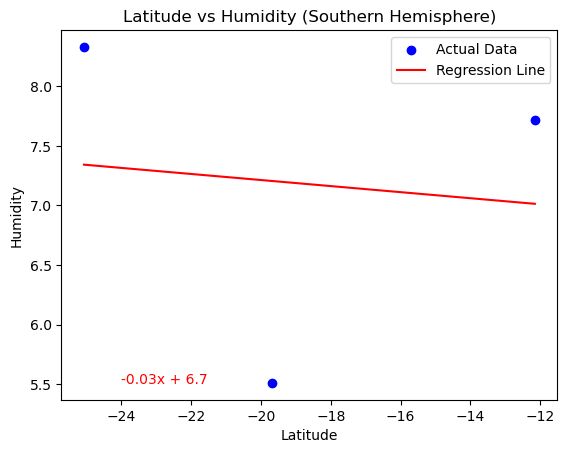

In [85]:
model_humidity_sh= LinearRegression()
model_humidity_sh.fit(x, y)
y_pred = model_humidity_sh.predict(x)
slope = model_humidity_sh.coef_[0]
intercept = model_humidity_sh.intercept_
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.annotate(str(round(slope,2)) + "x + " + str(round(intercept,2)),(-24,5.5), color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.show()

**Discussion about the linear relationship:** 

**Humidity** ***increases*** as **latitude** ***increases*** on the *northern hemisphere*.
**Humidity** ***decreases*** as **latitude** ***increases*** on the *southern hemisphere*.

### Cloudiness vs. Latitude Linear Regression Plot

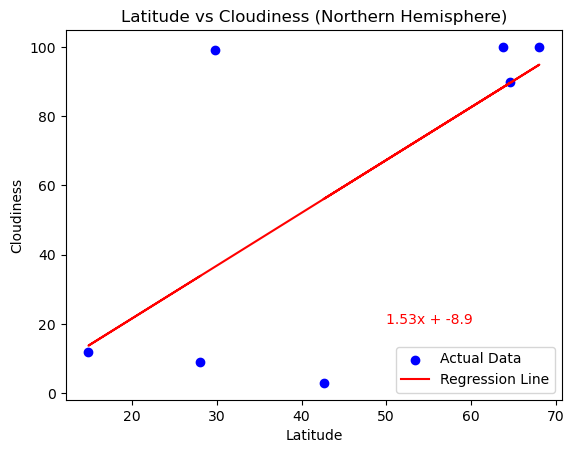

In [113]:
# Northern Hemisphere
x = northern_hemi_df[['Latitude']]
y = northern_hemi_df['Clouds']
model_cloudiness_nh= LinearRegression()
model_cloudiness_nh.fit(x, y)
y_pred = model_cloudiness_nh.predict(x)
slope = model_cloudiness_nh.coef_[0]
intercept = model_cloudiness_nh.intercept_
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.annotate(str(round(slope,2)) + "x + " + str(round(intercept,2)),(50,20), color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.show()

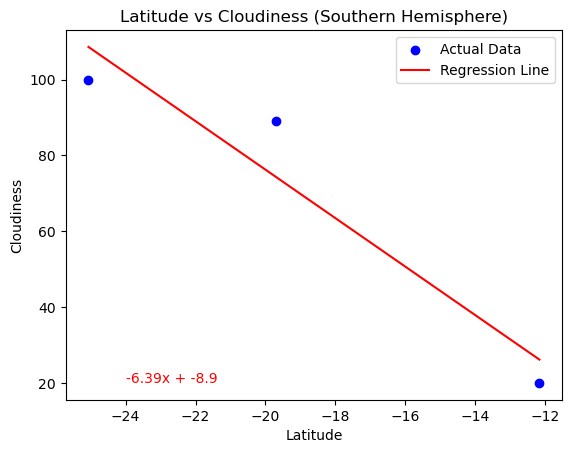

In [114]:
# Southern Hemisphere
x = southern_hemi_df[['Latitude']]
y = southern_hemi_df['Clouds']
model_cloudiness_sh= LinearRegression()
model_cloudiness_sh.fit(x, y)
y_pred = model_cloudiness_sh.predict(x)
slope = model_cloudiness_sh.coef_[0]
intercept = model_cloudiness_nh.intercept_
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Latitude vs Cloudiness (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(str(round(slope,2)) + "x + " + str(round(intercept,2)),(-24,20), color='red')
plt.legend()
plt.show()

**Discussion about the linear relationship:** 
**Cloudiness** ***increases*** as **latitude** ***increases*** on the *northern hemisphere*.
**Cloudiness** ***decreases*** as **latitude** ***increases*** on the *southern hemisphere*.

### Wind Speed vs. Latitude Linear Regression Plot

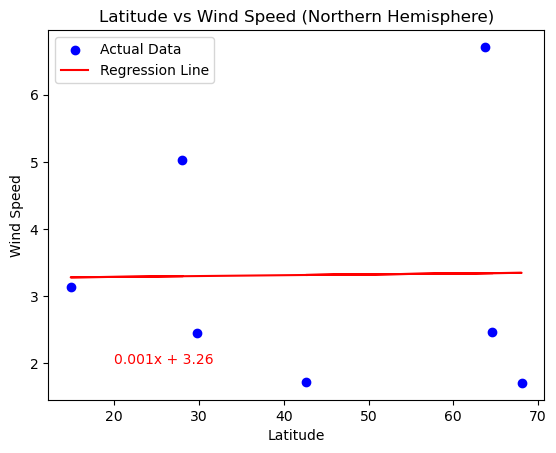

In [115]:
# Northern Hemisphere
x = northern_hemi_df[['Latitude']]
y = northern_hemi_df['Wind']
model_wind_nh= LinearRegression()
model_wind_nh.fit(x, y)
y_pred = model_wind_nh.predict(x)
slope = model_wind_nh.coef_[0]
intercept = model_wind_nh.intercept_
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(str(round(slope,3)) + "x + " + str(round(intercept,2)),(20,2), color='red')
plt.legend()
plt.show()

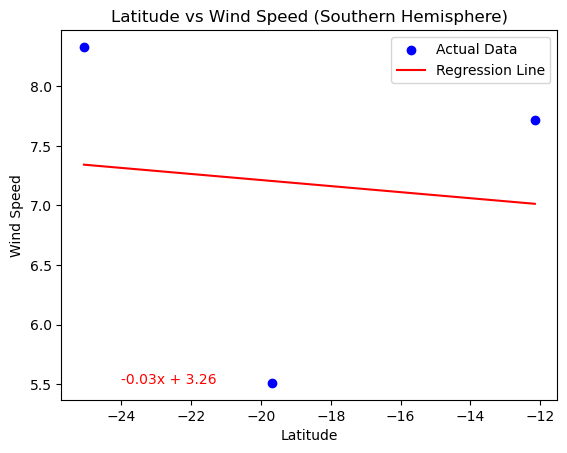

In [101]:
# Southern Hemisphere
x = southern_hemi_df[['Latitude']]
y = southern_hemi_df['Wind']
model_wind_sh= LinearRegression()
model_wind_sh.fit(x, y)
y_pred = model_wind_sh.predict(x)
slope = model_wind_sh.coef_[0]
intercept = model_wind_nh.intercept_
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(str(round(slope,2)) + "x + " + str(round(intercept,2)),(-24,5.5), color='red')
plt.legend()
plt.show()

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = LinearRegression(x, y)
    print(f"The r-value is: {r_value}")  # Print the r-value


**Discussion about the linear relationship:** 
**Wind speed** ***(very slightly) increases*** as **latitude** ***increases*** on the *northern hemisphere*.
**Wind speed** ***decreases*** as **latitude** ***increases*** on the *southern hemisphere*.